# Diversity trumps ability? Diversity equals ability
## Replicating Hong and Page's analysis in new framework
### Code for visualizing the results of the simulations
This Jupyter Notebook contains the code for visualizing the results of simulations and thereby test whether diversity trumps ability. 

## 1. Initialization

### Imports

In [2]:
import os
import glob 

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Basic functions

In [9]:
def produce_df_all(date: str = "", rename=True):
    files = [file for file in os.listdir("data") if file[:10] == "simulation" and date in file and not "README" in file]
    df_dummy = pd.read_csv(f"data/{files[0]}")
    df = pd.DataFrame(columns = df_dummy.columns, dtype=float) 
    for file in files:
        df_new = pd.read_csv(f"data/{file}")
        df = pd.concat([df, df_new], ignore_index=True)
    if rename:
        mapper = lambda x : x.replace("most_divers", "diverse").replace("accuracy_precision", "precision")
        columns_dict = {
            k: mapper(k) for k in list(df.columns)
        }
        df.rename(columns_dict, axis= 'columns', inplace=True)
    return df


def produce_df_group(df: pd.DataFrame, group_type: str, group_types: list):
    columns_new = [
        column for column in df.columns 
        if column.split("_")[0] not in group_types or column.split("_")[0] == group_type
    ]
    df_new = df[columns_new]
    def convert(string: str):
        output = string
        if string.split("_")[0] in group_types:
            output = string.replace(string.split("_")[0]+"_", "")
        return output
    rename_columns: dict = [convert(column) for column in columns_new]
    df_new.columns = rename_columns
    df_new.insert(1, "group_type", group_type)
    return df_new


def produce_df_groups(df: pd.DataFrame, group_types: list):
    df_list = []
    for group_type in group_types:
        df_list.append(produce_df_group(df, group_type, group_types))
    return pd.concat(df_list, ignore_index=True)

### Check

In [10]:
# @hidden_cell
# Optional: If you want to analyse one specific simulation
list_of_files = glob.glob('data/*.csv') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
print(latest_file)
df = pd.read_csv(latest_file)
df.describe()

data\uwe2.csv


,group_type,accuracy
count,30000.00000,30000.000000
mean,1.00000,0.907934
std,0.81651,0.022156
min,0.00000,0.798700
25%,0.00000,0.894100
50%,1.00000,0.910200
75%,2.00000,0.924000
max,2.00000,0.967300


## 2. The data and stats
### 2.1 Data
The data will be stored in DataFrame `df_groups` and in the csv file `data/sim_groups.csv`.

In [11]:
date = "202404"
df_all = produce_df_all(date = date)
df_all.to_csv(f"data/sim_all_{date}.csv")
group_types = ["best", "diverse", "random"] # "random", "x"
df_groups = produce_df_groups(df_all, group_types)
df_groups.to_csv(f"data/sim_groups_{date}.csv")
df_groups

,community_number,group_type,group_size,number_of_sources,source_degree,source_reliability_range,number_of_voting_simulations,number_of_agents,difficulty,accuracy,precision,diversity,average
0,3.0,best,5.0,11.0,5.0,(0.45 to 0.65),10000.0,20.0,0.711780,0.7260,0.017483,0.200000,0.723392
1,2.0,best,5.0,11.0,5.0,(0.45 to 0.65),10000.0,20.0,0.644859,0.6699,0.018433,0.200000,0.655272
2,1.0,best,5.0,11.0,5.0,(0.45 to 0.65),10000.0,20.0,0.714810,0.7438,0.017112,0.200000,0.745771
3,0.0,best,5.0,11.0,5.0,(0.45 to 0.65),10000.0,20.0,0.571585,0.6398,0.018818,0.200000,0.629914
4,4.0,best,5.0,11.0,5.0,(0.45 to 0.65),10000.0,20.0,0.680138,0.6894,0.018139,0.200000,0.695622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
719995,9995.0,random,21.0,21.0,5.0,(0.6 to 0.8),10000.0,20.0,0.965617,0.9408,0.009251,0.759048,0.812794
719996,9996.0,random,21.0,21.0,5.0,(0.6 to 0.8),10000.0,20.0,0.977753,0.9650,0.007204,0.776190,0.837211
719997,9997.0,random,21.0,21.0,5.0,(0.6 to 0.8),10000.0,20.0,0.984495,0.9734,0.006308,0.746667,0.868083
719998,9999.0,random,21.0,21.0,5.0,(0.6 to 0.8),10000.0,20.0,0.981067,0.9655,0.007154,0.753333,0.845312


In [12]:
df_all

,community_number,group_size,number_of_sources,source_degree,source_reliability_range,number_of_voting_simulations,number_of_agents,difficulty,best_accuracy,best_precision,best_diversity,best_average,diverse_accuracy,diverse_precision,diverse_diversity,diverse_average,random_accuracy,random_precision,random_diversity,random_average
0,3.0,5.0,11.0,5.0,(0.45 to 0.65),10000.0,20.0,0.711780,0.7260,0.017483,0.2,0.723392,0.7013,0.017941,0.533684,0.653971,0.7064,0.017852,0.520000,0.668800
1,2.0,5.0,11.0,5.0,(0.45 to 0.65),10000.0,20.0,0.644859,0.6699,0.018433,0.2,0.655272,0.6305,0.018920,0.536842,0.599027,0.6399,0.018817,0.640000,0.604945
2,1.0,5.0,11.0,5.0,(0.45 to 0.65),10000.0,20.0,0.714810,0.7438,0.017112,0.2,0.745771,0.6853,0.018204,0.521053,0.641169,0.7079,0.017825,0.560000,0.670098
3,0.0,5.0,11.0,5.0,(0.45 to 0.65),10000.0,20.0,0.571585,0.6398,0.018818,0.2,0.629914,0.5812,0.019339,0.548421,0.558852,0.5600,0.019458,0.580000,0.553257
4,4.0,5.0,11.0,5.0,(0.45 to 0.65),10000.0,20.0,0.680138,0.6894,0.018139,0.2,0.695622,0.6655,0.018495,0.553684,0.620483,0.6812,0.018267,0.620000,0.635464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,9995.0,21.0,21.0,5.0,(0.6 to 0.8),10000.0,20.0,0.965617,0.9178,0.010767,0.3,0.884014,0.9399,0.009317,0.760000,0.815401,0.9408,0.009251,0.759048,0.812794
239996,9996.0,21.0,21.0,5.0,(0.6 to 0.8),10000.0,20.0,0.977753,0.9374,0.009496,0.3,0.905665,0.9469,0.008790,0.757895,0.826281,0.9650,0.007204,0.776190,0.837211
239997,9997.0,21.0,21.0,5.0,(0.6 to 0.8),10000.0,20.0,0.984495,0.9543,0.008186,0.3,0.924021,0.9646,0.007244,0.760000,0.849288,0.9734,0.006308,0.746667,0.868083
239998,9999.0,21.0,21.0,5.0,(0.6 to 0.8),10000.0,20.0,0.981067,0.9419,0.009170,0.3,0.913584,0.9677,0.006930,0.751579,0.856460,0.9655,0.007154,0.753333,0.845312


<Axes: >

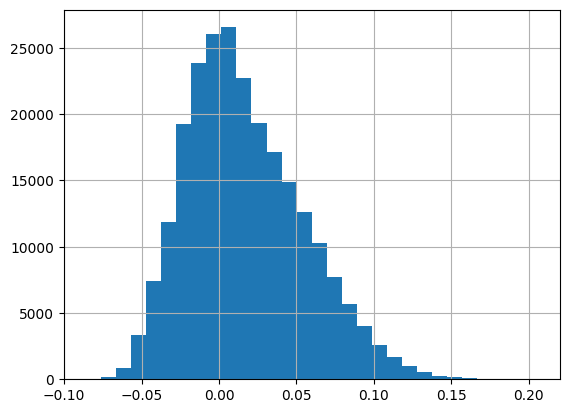

In [13]:

df_all["test"] = df_all["best_accuracy"] - df_all["diverse_accuracy"]
df_all["test"].hist(bins=30)

### 2.2 Statistical t-test
(Note: inspired by [Python for Data Science](https://pythonfordatascienceorg.wordpress.com/paired-samples-t-test-python/).)

I think that the appropriate *parametric* statistical test is the dependent *t*-test for paired samples ([Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples)).
On my understanding of this statistical t-test:
* The *sign of the statistic* indicates whether population A is higher or lower than population B. I don't know whether the quantity of the statistic indicates anything. 
* The *p-value* indicates whether there is a statistically significant difference between the population (low values indicate high statistical significance).
* I don't know what the *degrees of freedom* indicate. 

To report a statistical t-test (see [Social Science Statistics](https://www.socscistatistics.com/tutorials/ttest/default.aspx)):
* Report the means and variances of populations A and B.
* Report the statistical significance (statistic, p-value, degrees of freedom) and the difference in units (difference in the means of populations A and B)

In [14]:
# stats.shapiro(df_all["test"])
df_test = df_all[df_all["number_of_sources"]==11]
result = stats.ttest_rel(df_test["best_accuracy"], df_test['diverse_accuracy'])
t_statistic = result.statistic
t_pvalue = result.pvalue
t_df = result.df
print(f"statistic={t_statistic}, p={t_pvalue}, df={t_df}")

statistic=283.17704168033794, p=0.0, df=119999


In [15]:
x_mean = round(df_test["best_accuracy"].mean(), 3)
best_var = round(df_test["best_accuracy"].var(), 3)
y_mean = round(df_test["diverse_accuracy"].mean(), 3)
diverse_var = round(df_test["diverse_accuracy"].var(), 3)

# Caution: the following sentence says that the best-team was more accurate than the diverse-team, but this depends on the sign of the statistic.
print(f"The team of best-performing agents was more accurate ({x_mean}, {best_var}) than the team of diverse agents ({y_mean}, {diverse_var}).")
print(f"There was a statistically significant increase in accuracy (t({t_df})={t_statistic}, p={t_pvalue}) of {round(x_mean - y_mean, 3)}.")

The team of best-performing agents was more accurate (0.801, 0.008) than the team of diverse agents (0.778, 0.013).
There was a statistically significant increase in accuracy (t(119999)=283.17704168033794, p=0.0) of 0.023.


In [16]:
def perform_t_test(
    df: pd.DataFrame, 
    n_sources, 
    source_rel_range, 
    group_size, 
    x = "best_accuracy", 
    y = "diverse_accuracy",
    *args, 
    **kwargs,
):
    test_df = df[
        (df["number_of_sources"] == n_sources) & 
        (df["sources_reliability_distribution"] == source_rel_range) & 
        (df["group_size"] == group_size)
        ]
    best_mean = round(test_df[x].mean(), 3)
    diverse_mean = round(test_df[y].mean(), 3)
    difference = round(best_mean - diverse_mean, 3)
    result = stats.ttest_rel(test_df[x], test_df[y])
    p_value = result.pvalue
    return difference, p_value, best_mean, diverse_mean

In [17]:
stats_data = [[
    n_sources,
    source_rel_range,
    group_size,
    np.nan, 
    np.nan,
    np.nan,
    np.nan]
    for n_sources in [11, 21]
    for source_rel_range in ["(0.45 to 0.65)", "(0.5 to 0.7)", "(0.55 to 0.75)", "(0.6 to 0.8)"]
    for group_size in [5, 11, 21]
]
columns=["n_sources", "source_rel_range", "group_size", "difference", "p_value", "best", "diverse"]
stats_df = pd.DataFrame(data=stats_data, columns=columns)
for row in stats_df.iterrows():
    k = row[0]
    params = row[1]
    difference, p_value, x_mean, y_mean = perform_t_test(df = df_all, **params)
    stats_df.at[k, "difference"] = difference
    stats_df.at[k, "p_value"] = p_value < 0.01
    stats_df.at[k, "best"] = x_mean
    stats_df.at[k, "diverse"] = y_mean

stats_df

C:\Users\heind\AppData\Local\Temp\ipykernel_13128\2716843138.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_df.at[k, "p_value"] = p_value < 0.01


,n_sources,source_rel_range,group_size,difference,p_value,best,diverse
0,11,(0.45 to 0.65),5,0.057,True,0.683,0.626
1,11,(0.45 to 0.65),11,0.057,True,0.683,0.626
2,11,(0.45 to 0.65),21,0.051,True,0.677,0.626
3,11,(0.5 to 0.7),5,0.024,True,0.765,0.741
4,11,(0.5 to 0.7),11,0.034,True,0.775,0.741
5,11,(0.5 to 0.7),21,0.030,True,0.771,0.741
6,11,(0.55 to 0.75),5,0.000,False,0.837,0.837
7,11,(0.55 to 0.75),11,0.015,True,0.852,0.837
8,11,(0.55 to 0.75),21,0.014,True,0.851,0.837
9,11,(0.6 to 0.8),5,-0.012,True,0.897,0.909


In [18]:
stats_table_df = stats_df.copy()
for row in stats_table_df.iterrows():
    source_rel_range = row[1]["source_rel_range"]
    rel_list = source_rel_range.replace("(","").replace(")","").replace("to ","").split(" ")
    rel_list = [float(x) for x in rel_list]
    rel_mean = np.mean(rel_list)
    stats_table_df.at[row[0], "source_rel_mean"] = rel_mean
    
stats_table_df
    

,n_sources,source_rel_range,group_size,difference,p_value,best,diverse,source_rel_mean
0,11,(0.45 to 0.65),5,0.057,True,0.683,0.626,0.55
1,11,(0.45 to 0.65),11,0.057,True,0.683,0.626,0.55
2,11,(0.45 to 0.65),21,0.051,True,0.677,0.626,0.55
3,11,(0.5 to 0.7),5,0.024,True,0.765,0.741,0.60
4,11,(0.5 to 0.7),11,0.034,True,0.775,0.741,0.60
5,11,(0.5 to 0.7),21,0.030,True,0.771,0.741,0.60
6,11,(0.55 to 0.75),5,0.000,False,0.837,0.837,0.65
7,11,(0.55 to 0.75),11,0.015,True,0.852,0.837,0.65
8,11,(0.55 to 0.75),21,0.014,True,0.851,0.837,0.65
9,11,(0.6 to 0.8),5,-0.012,True,0.897,0.909,0.70


C:\Users\heind\AppData\Local\Temp\ipykernel_13128\1026507348.py:3: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(stats_table_df, x="source_rel_mean", y="difference", hue="group_size", style="n_sources", markers="o")


Text(0, 0.5, 'Difference (best minus diverse)')

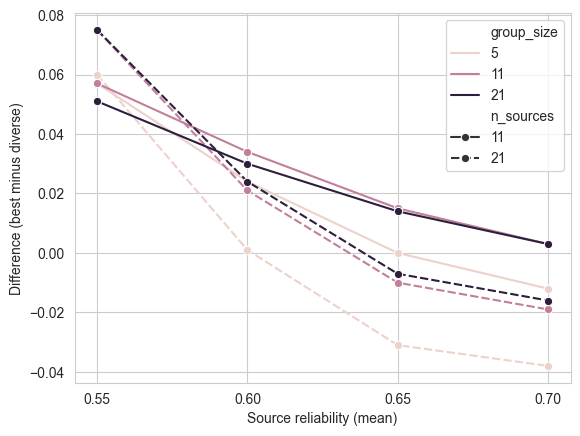

In [19]:
sns.set_style("whitegrid")
sns.set_palette("PuBuGn_d")
ax = sns.lineplot(stats_table_df, x="source_rel_mean", y="difference", hue="group_size", style="n_sources", markers="o")
ax.set_xticks(0.55 + 0.05 * np.arange(0, 4))
ax.set_xlabel("Source reliability (mean)")
ax.set_ylabel("Difference (best minus diverse)")

C:\Users\heind\AppData\Local\Temp\ipykernel_13128\2124492220.py:14: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(


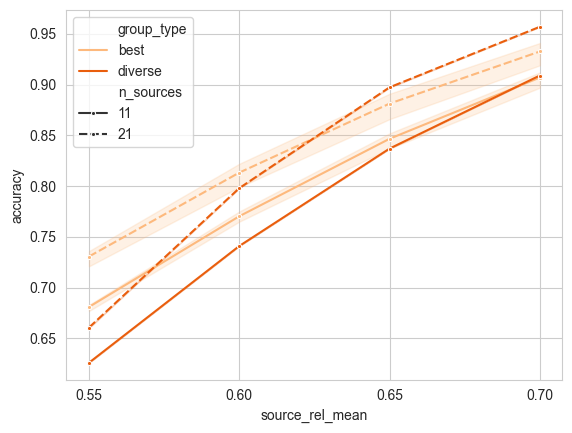

In [20]:
best_df = stats_table_df.copy()
best_df.rename(columns={"best": "accuracy"}, inplace=True)
best_df.drop(columns=["diverse"], inplace=True)
best_df["group_type"] = "best"

diverse_df = stats_table_df.copy()
diverse_df.rename(columns={"diverse": "accuracy"}, inplace=True)
diverse_df.drop(columns=["best"], inplace=True)
diverse_df["group_type"] = "diverse"

accuracies_df = pd.concat([best_df, diverse_df])
accuracies_df

ax = sns.lineplot(
    data=accuracies_df, 
    x="source_rel_mean", 
    y="accuracy", 
    hue="group_type", 
    style="n_sources", 
    markers=".",
    palette="Oranges"
    )
ax.set_xticks(0.55 + 0.05 * np.arange(0, 4))

## 2.3 Statistical analysis (non-parametric)
See [link](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/?__cf_chl_tk=lnCuu1TDWpd9lMegxidt06vpjWJH8_OuZvP.y_XT.VU-1719394717-0.0.1.1-4713) for more information. 

I believe I should do the Wilcoxon signed rank test, where the data samples are paired. 

To report the test results:
- abc

In [6]:
df_all = pd.read_csv("data/sim_all_202404.csv")


In [9]:
def produce_stats_wilcoxon(
    df: pd.DataFrame, 
    x = "best_accuracy", 
    y = "diverse_accuracy",
    *args, 
    **kwargs,
):
    def perform_wilcoxon_test(
        df: pd.DataFrame, 
        n_sources, 
        source_rel_range, 
        group_size, 
        *args, 
        **kwargs,
    ):
        test_df = df[
            (df["number_of_sources"] == n_sources) & 
            (df["sources_reliability_distribution"] == source_rel_range) & 
            (df["group_size"] == group_size)
            ]
        x_mean = round(test_df[x].mean(), 3)
        y_mean = round(test_df[y].mean(), 3)
        difference = round(x_mean - y_mean, 3)
        result = stats.wilcoxon(test_df[x], test_df[y])
        p_value = result.pvalue
        statistic = result.statistic
        return difference, p_value, statistic, x_mean, y_mean

    stats_data = [[
        n_sources,
        source_rel_range,
        group_size,
        np.nan, 
        np.nan,
        np.nan,
        np.nan,
        np.nan]
        for n_sources in [11, 21]
        for source_rel_range in ["(0.45 to 0.65)", "(0.5 to 0.7)", "(0.55 to 0.75)", "(0.6 to 0.8)"]
        for group_size in [5, 11, 21]
    ]
    x_name = x.split("_")[0]
    y_name = y.split("_")[0]
    columns=[
        "n_sources", "source_rel_range", "group_size", "difference", "p_value", "statistic", x_name, y_name
        ]
    stats_df = pd.DataFrame(data=stats_data, columns=columns)
    for row in stats_df.iterrows():
        k = row[0]
        params = row[1]
        difference, p_value, statistic, x_mean, y_mean = perform_wilcoxon_test(df = df, **params)
        stats_df.at[k, "difference"] = difference
        stats_df.at[k, "p_value"] = round(p_value,3)
        stats_df.at[k, "statistic"] = round(statistic,3)
        stats_df.at[k, x_name] = x_mean
        stats_df.at[k, y_name] = y_mean
    return stats_df

s = produce_stats_wilcoxon(df=df_all)
s

,n_sources,source_rel_range,group_size,difference,p_value,statistic,best,diverse
0,11,(0.45 to 0.65),5,0.057,0.000,31629.5,0.683,0.626
1,11,(0.45 to 0.65),11,0.057,0.000,1585.0,0.683,0.626
2,11,(0.45 to 0.65),21,0.051,0.000,1454.5,0.677,0.626
3,11,(0.5 to 0.7),5,0.024,0.000,2747880.0,0.765,0.741
4,11,(0.5 to 0.7),11,0.034,0.000,148564.0,0.775,0.741
5,11,(0.5 to 0.7),21,0.030,0.000,145249.0,0.771,0.741
6,11,(0.55 to 0.75),5,0.000,0.822,24822819.0,0.837,0.837
7,11,(0.55 to 0.75),11,0.015,0.000,3893687.0,0.852,0.837
8,11,(0.55 to 0.75),21,0.014,0.000,3319057.5,0.851,0.837
9,11,(0.6 to 0.8),5,-0.012,0.000,3838560.5,0.897,0.909


array([[<Axes: title={'center': 'difference'}>]], dtype=object)

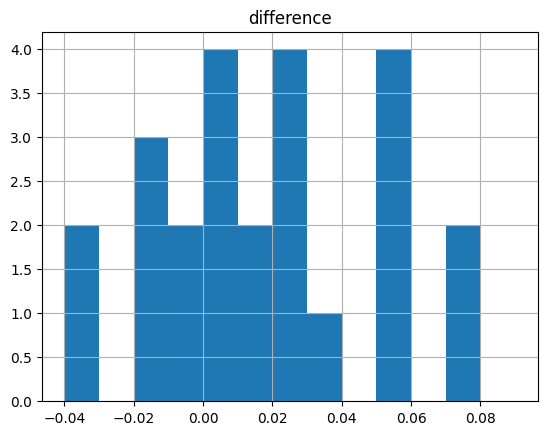

In [17]:
b = -0.04 + 0.01* np.arange(0, 14, dtype=int)
s.hist(column="difference", bins=b)


In [23]:
produce_stats_wilcoxon(df=df_all, x="best_accuracy", y="random_accuracy")

,n_sources,source_rel_range,group_size,difference,p_value,statistic,best,random
0,11,(0.45 to 0.65),5,0.068,0.0,2678.0,0.683,0.615
1,11,(0.45 to 0.65),11,0.060,0.0,614.0,0.683,0.623
2,11,(0.45 to 0.65),21,0.050,0.0,1245.0,0.677,0.627
3,11,(0.5 to 0.7),5,0.043,0.0,286989.0,0.765,0.722
4,11,(0.5 to 0.7),11,0.040,0.0,55932.0,0.775,0.735
5,11,(0.5 to 0.7),21,0.029,0.0,194375.5,0.771,0.742
6,11,(0.55 to 0.75),5,0.023,0.0,3242929.5,0.837,0.814
7,11,(0.55 to 0.75),11,0.021,0.0,1350427.0,0.852,0.831
8,11,(0.55 to 0.75),21,0.012,0.0,4377549.5,0.851,0.839
9,11,(0.6 to 0.8),5,0.009,0.0,12505107.5,0.897,0.888


In [24]:
produce_stats_wilcoxon(df=df_all, x="diverse_accuracy", y="random_accuracy")

,n_sources,source_rel_range,group_size,difference,p_value,statistic,diverse,random
0,11,(0.45 to 0.65),5,0.011,0.0,13231055.5,0.626,0.615
1,11,(0.45 to 0.65),11,0.003,0.0,19911388.0,0.626,0.623
2,11,(0.45 to 0.65),21,-0.001,0.0,23364984.5,0.626,0.627
3,11,(0.5 to 0.7),5,0.019,0.0,6217825.5,0.741,0.722
4,11,(0.5 to 0.7),11,0.006,0.0,16163066.0,0.741,0.735
5,11,(0.5 to 0.7),21,-0.001,0.0,22410134.5,0.741,0.742
6,11,(0.55 to 0.75),5,0.023,0.0,2461328.0,0.837,0.814
7,11,(0.55 to 0.75),11,0.006,0.0,13446914.0,0.837,0.831
8,11,(0.55 to 0.75),21,-0.002,0.0,21642753.0,0.837,0.839
9,11,(0.6 to 0.8),5,0.021,0.0,1270165.5,0.909,0.888


## 3. Plotting
Check out http://seaborn.pydata.org/tutorial/categorical.html for different ways to visualize categorical data.

### 3.1 Team accuracy

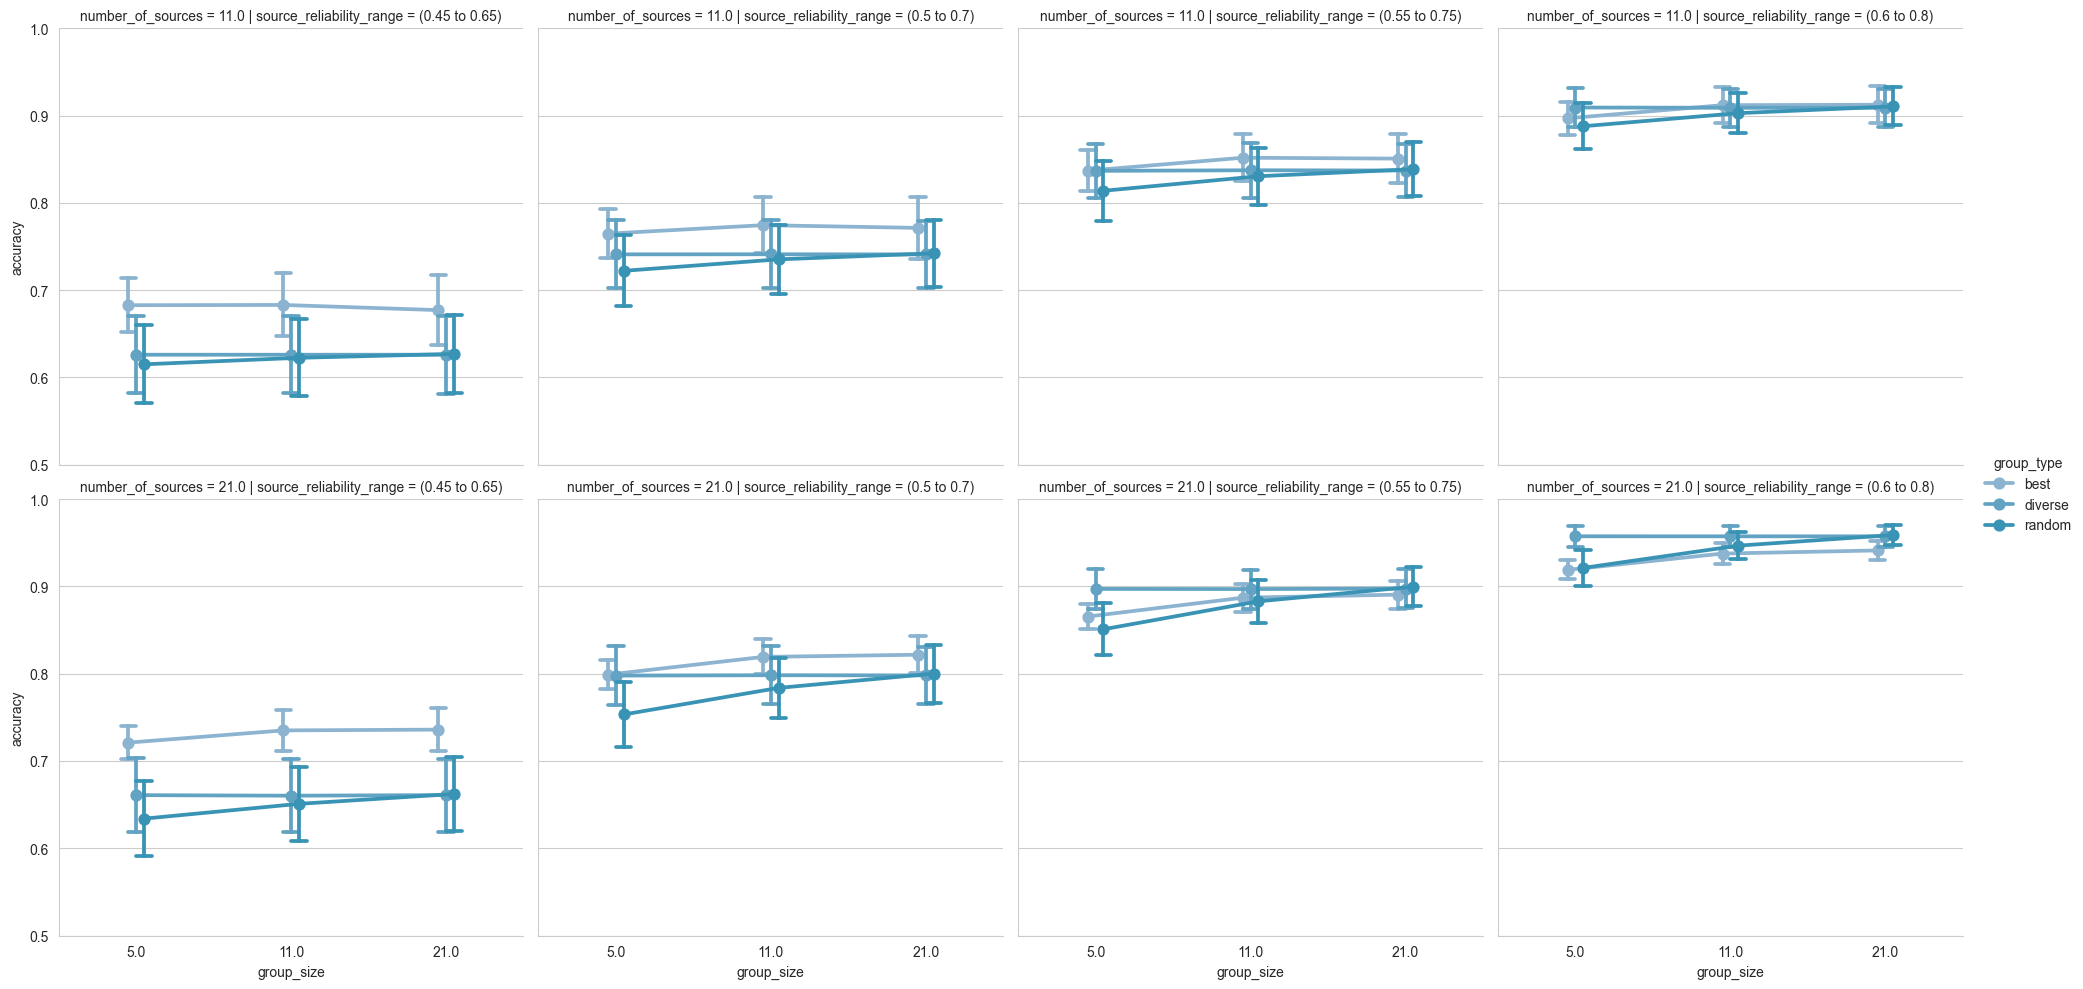

In [25]:
params = {
    "data": df_groups,
    "x": "group_size",
    "y": "accuracy",
    "hue": "group_type",
    "errorbar": "sd",
    "capsize": 0.1,
    "dodge": 0.1,
    "kind": "point",
    "row": "number_of_sources",
    "col": "sources_reliability_distribution",
}
sns.set_style("whitegrid")
ax = sns.catplot(**params)

if params["y"] == "accuracy":
    ax.set(ylim=(0.5, 1))

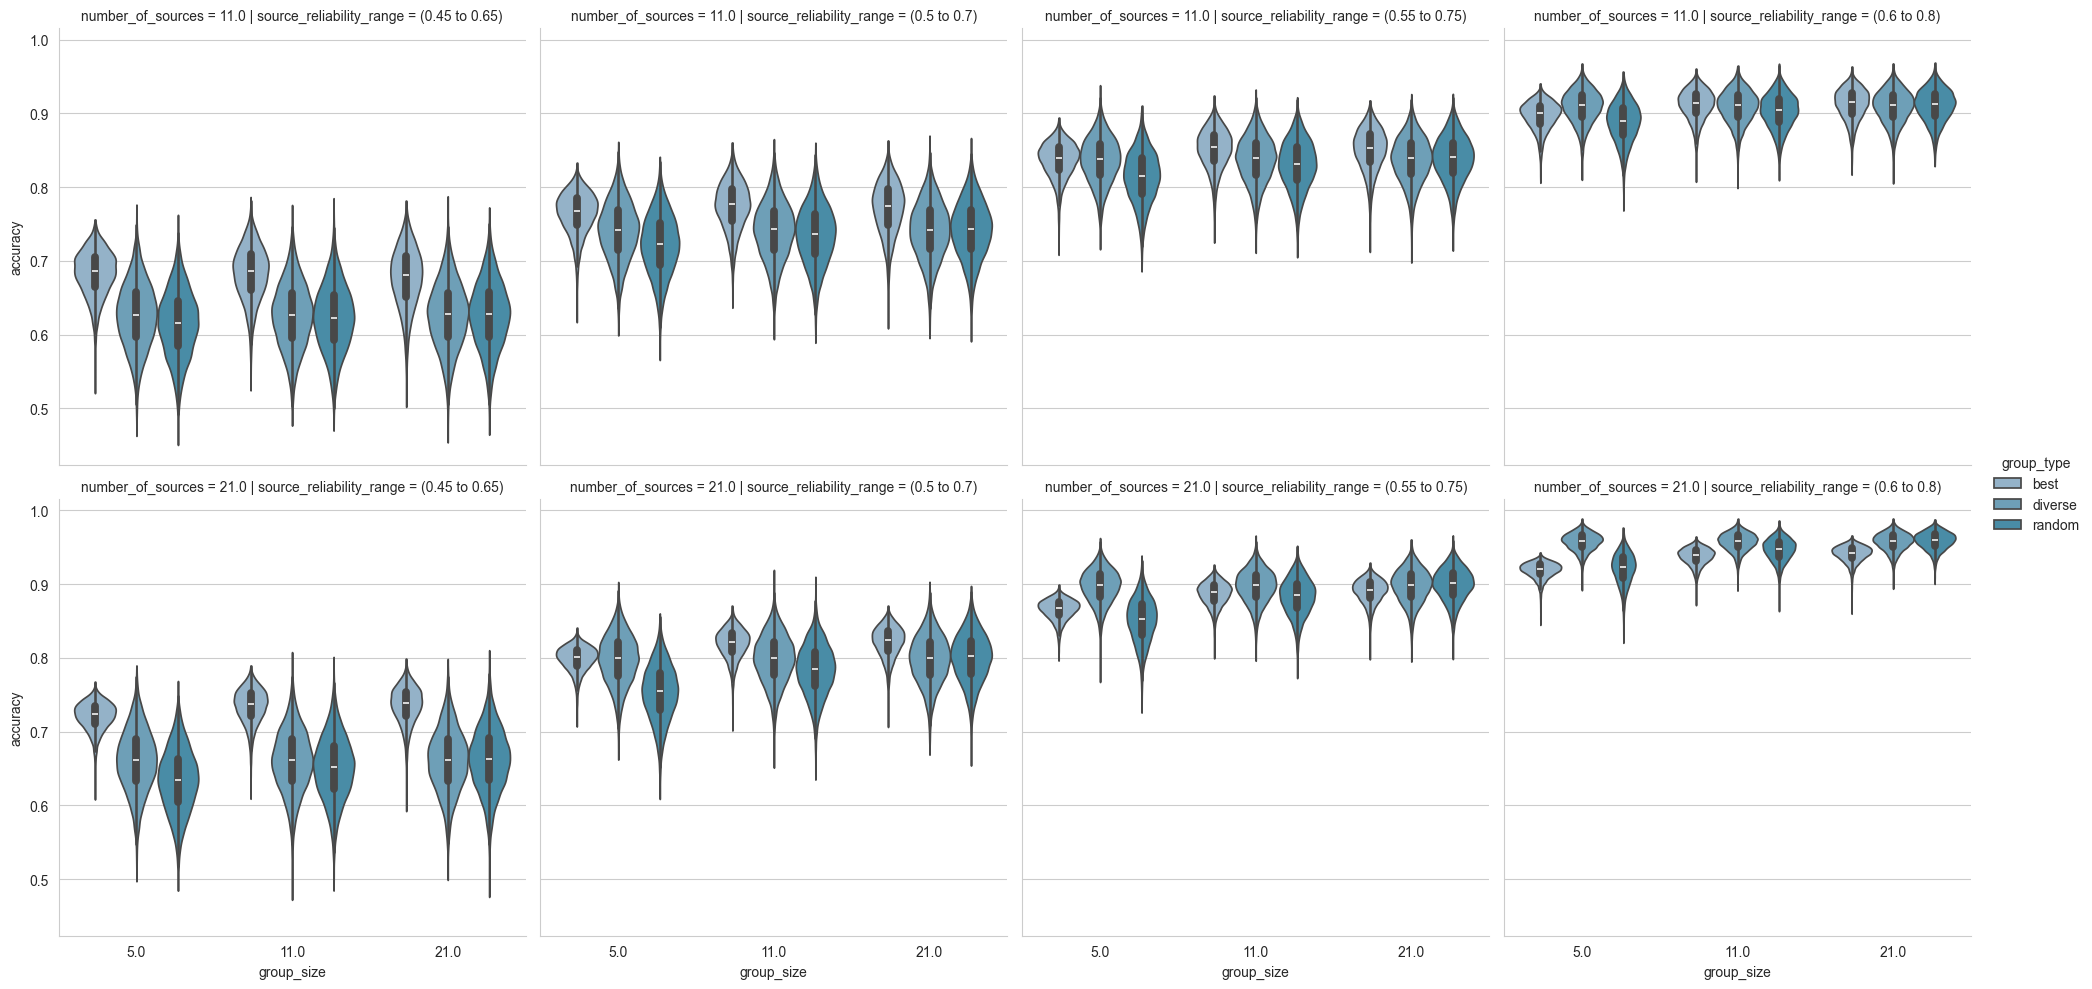

In [26]:
sns.catplot(
    data=df_groups, 
    x="group_size", 
    y="accuracy", 
    hue = "group_type",
    # capsize=0.1,
    kind="violin",
    cut=0,
#     inner=None,
    orient="v",
#     split=True,
    row= "number_of_sources",
    col="sources_reliability_distribution",
    # col="number_of_sources",
)

### 3.2 Average Ability

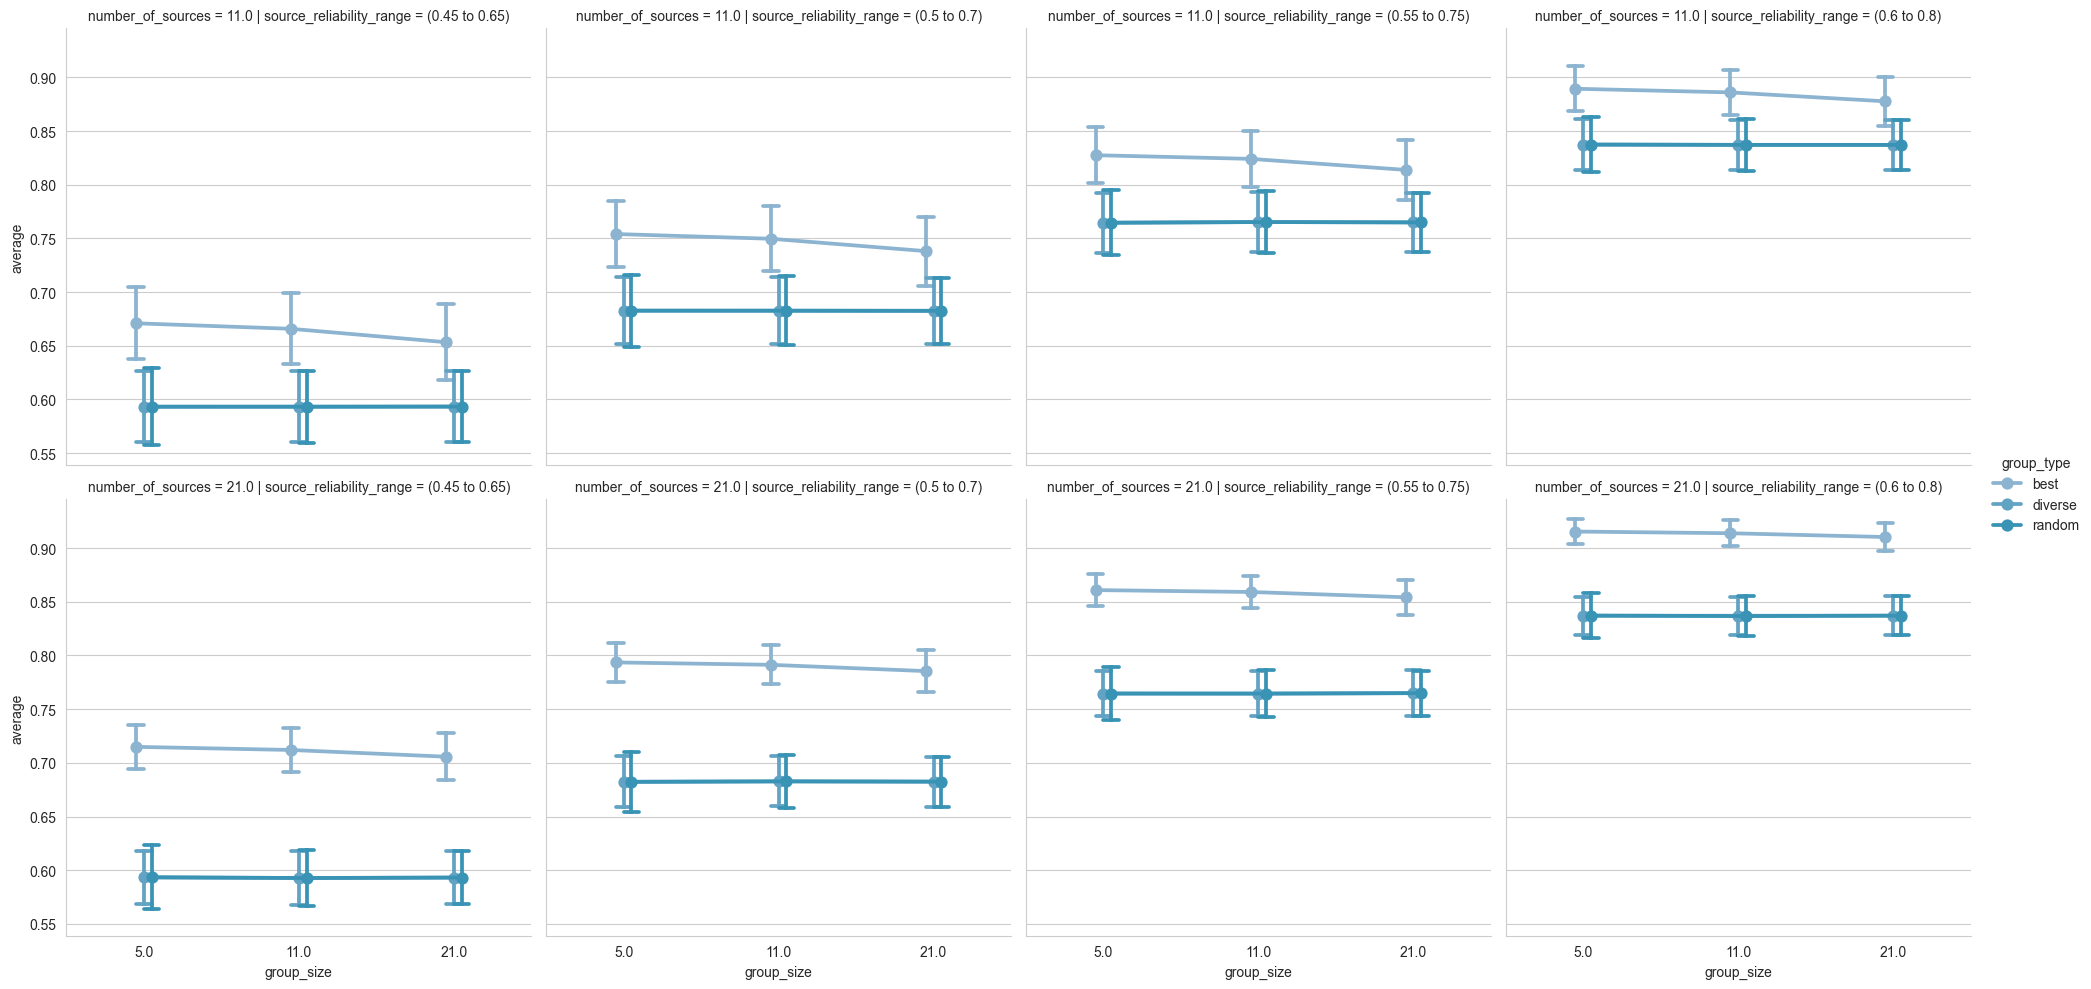

In [27]:
params = {
    "data": df_groups,
    "x": "group_size",
#     x: "group_type",
#     join: False,
#     "y": "diversity",
    "y": "average",
    "hue": "group_type",
    "errorbar": "sd",
    "capsize": 0.1,
    "dodge": 0.1,
    "kind": "point",
    "row": "number_of_sources",
    "col": "sources_reliability_distribution",
}
sns.set_style("whitegrid")
ax = sns.catplot(**params)

if params["y"] == "accuracy":
    ax.set(ylim=(0.5, 1))

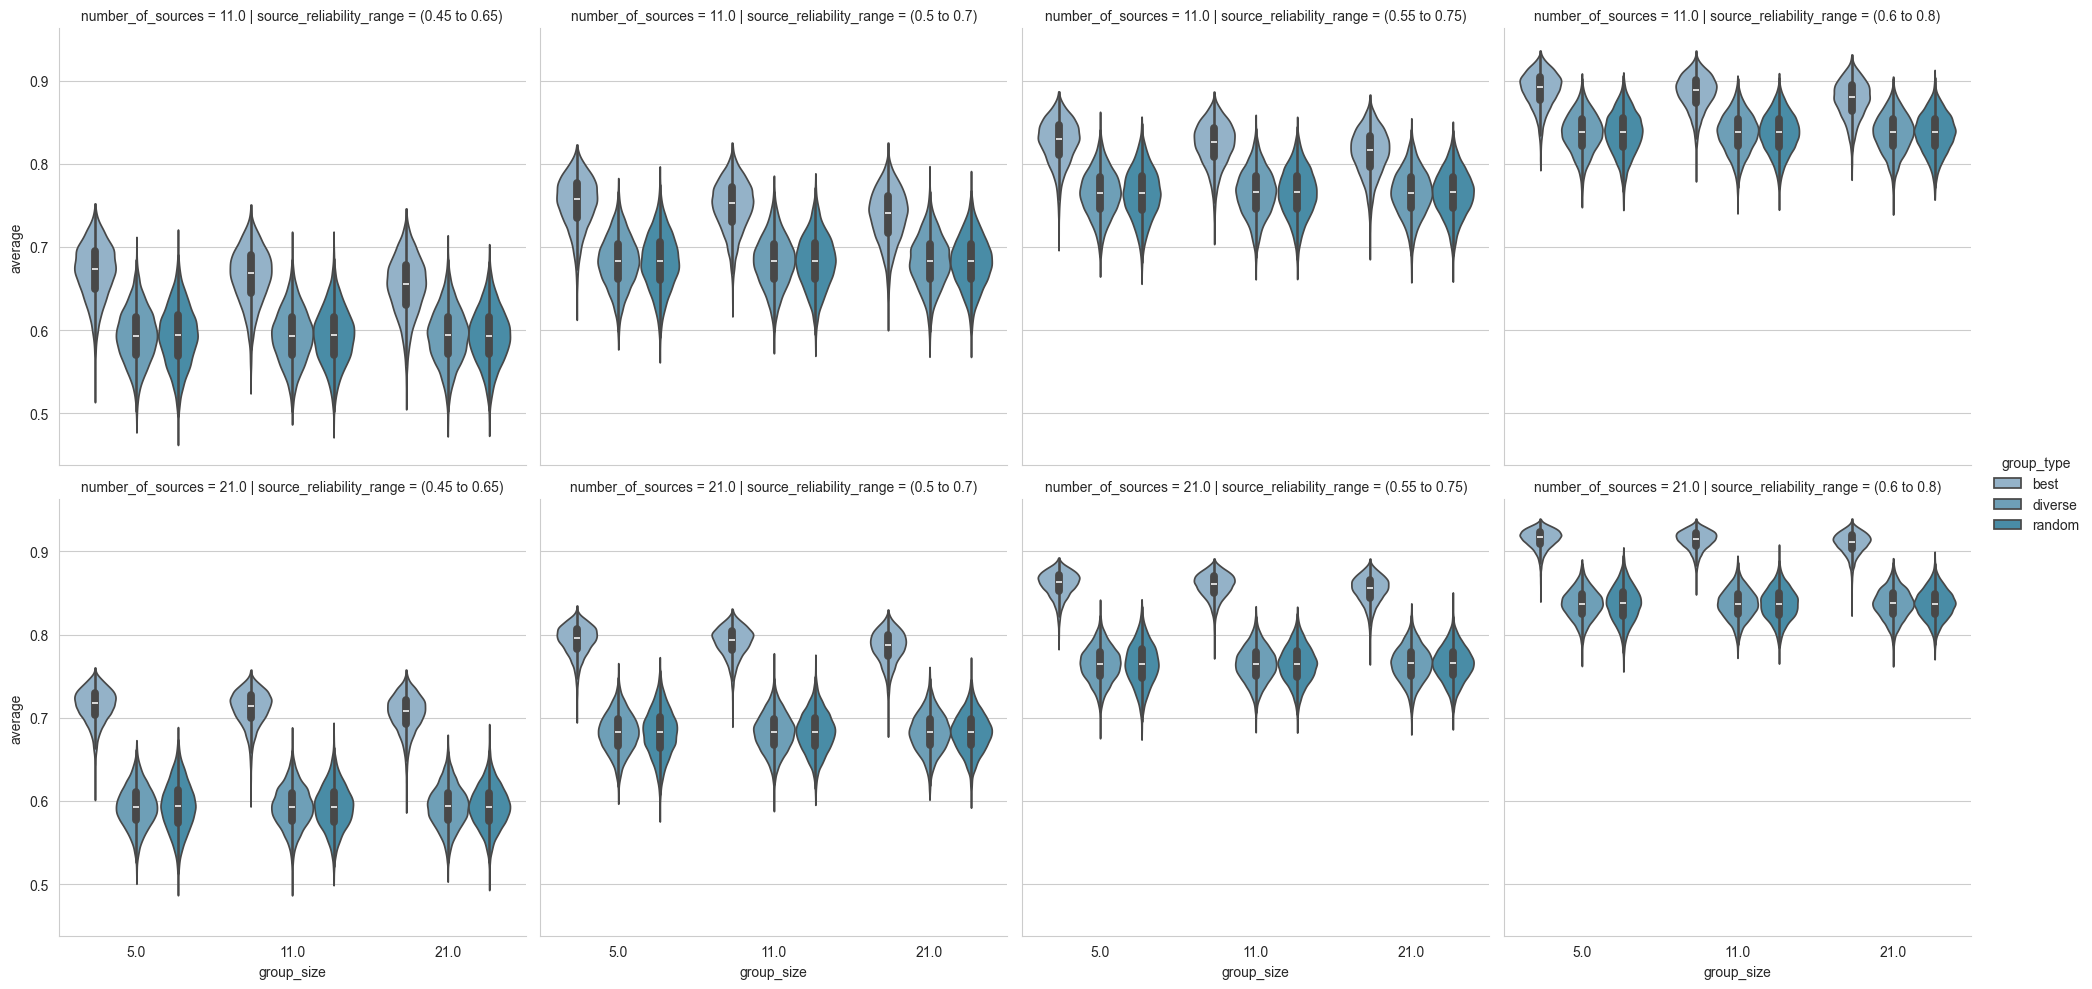

In [28]:
# df_a = df_groups[df_groups["sources_reliability_distribution"] == "(0.45 to 0.65)"]
sns.catplot(
    data=df_groups, 
    x="group_size", 
    y="average", 
    hue = "group_type",
    # capsize=0.1,
    kind="violin",
    cut=0,
#     inner=None,
    orient="v",
#     split=True,
    row= "number_of_sources",
    col="sources_reliability_distribution",
    
)

### 3.3 Team Diversity

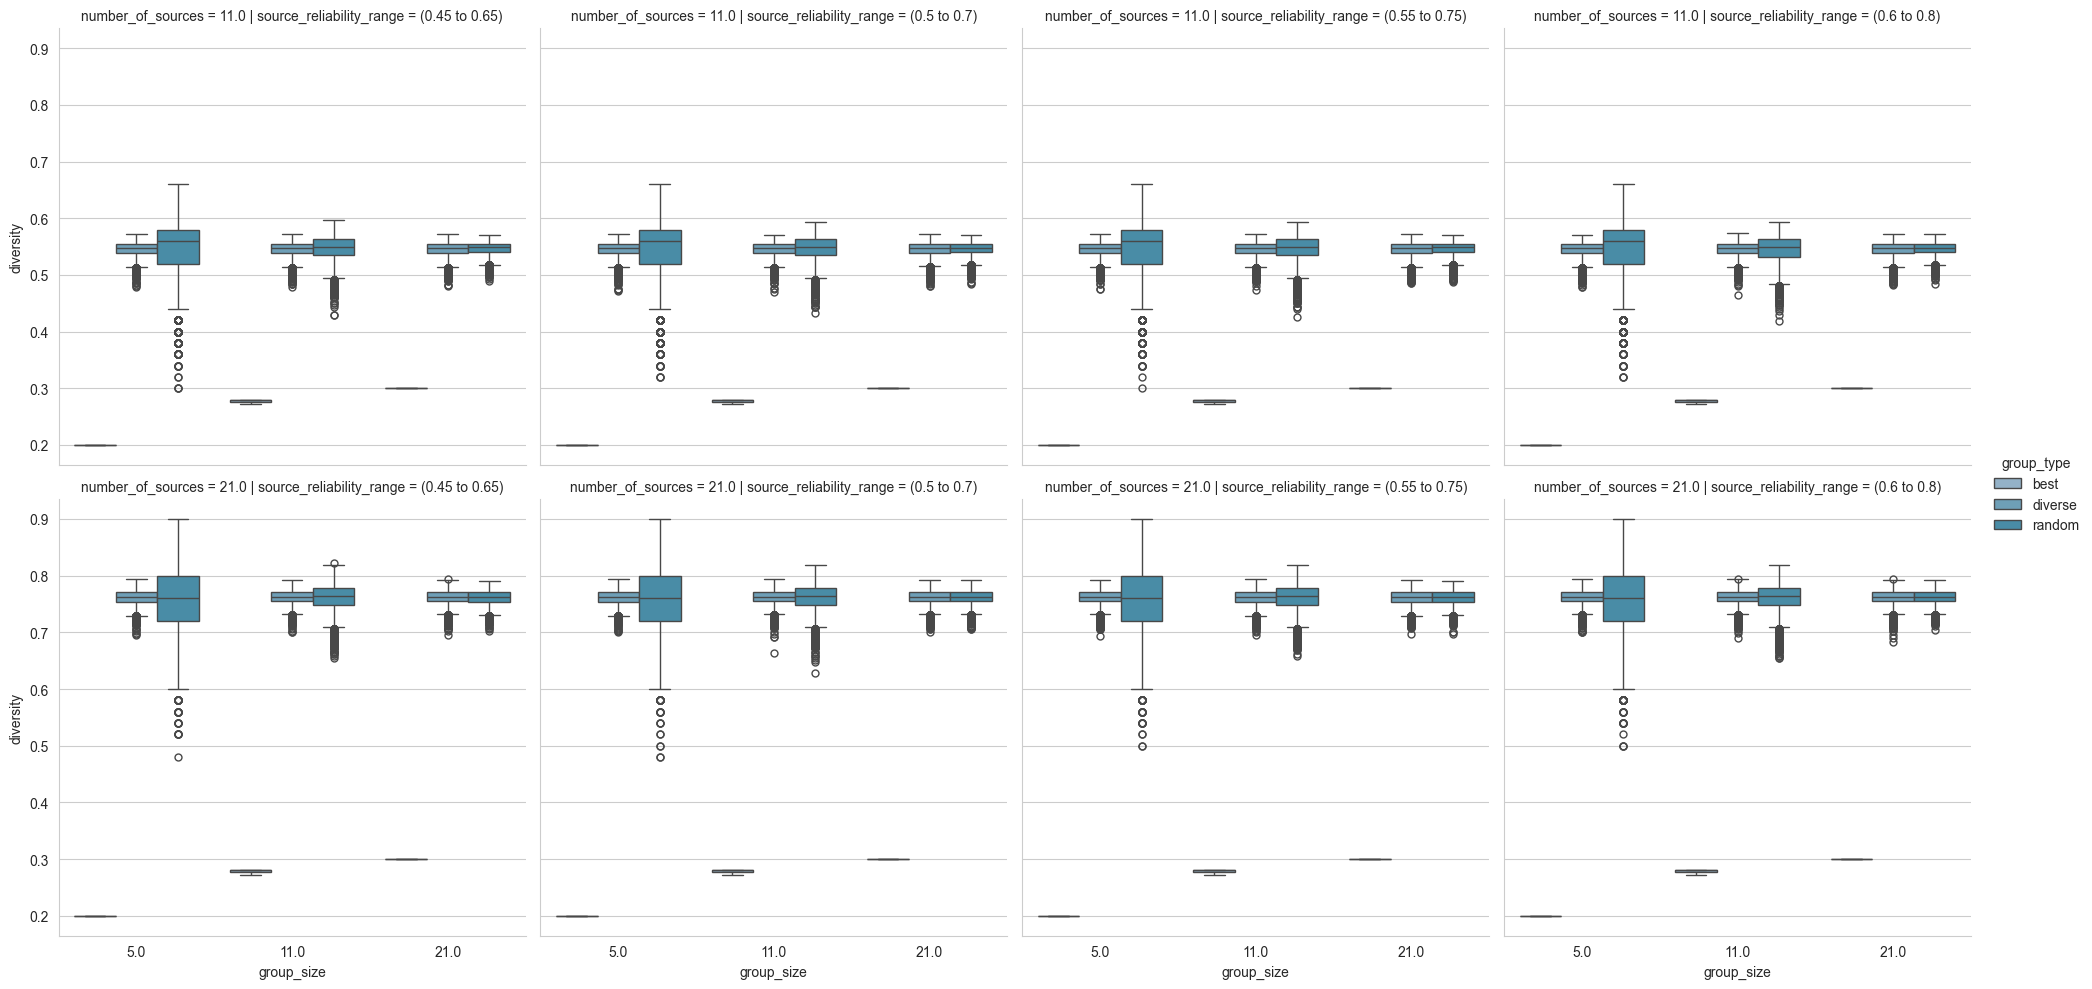

In [29]:
sns.set_style("whitegrid")

boxplot = sns.catplot(
    data=df_groups,
    x="group_size",
    y="diversity",    
    kind="box", 
    hue="group_type",
    row= "number_of_sources",
    col="sources_reliability_distribution",
#     cmap="jet",
#     title="Best, random and diverse groups",
#     ylim=(0.5,1),
#     grid=True
)  
# boxplot.set(ylim=(0.5, 1))

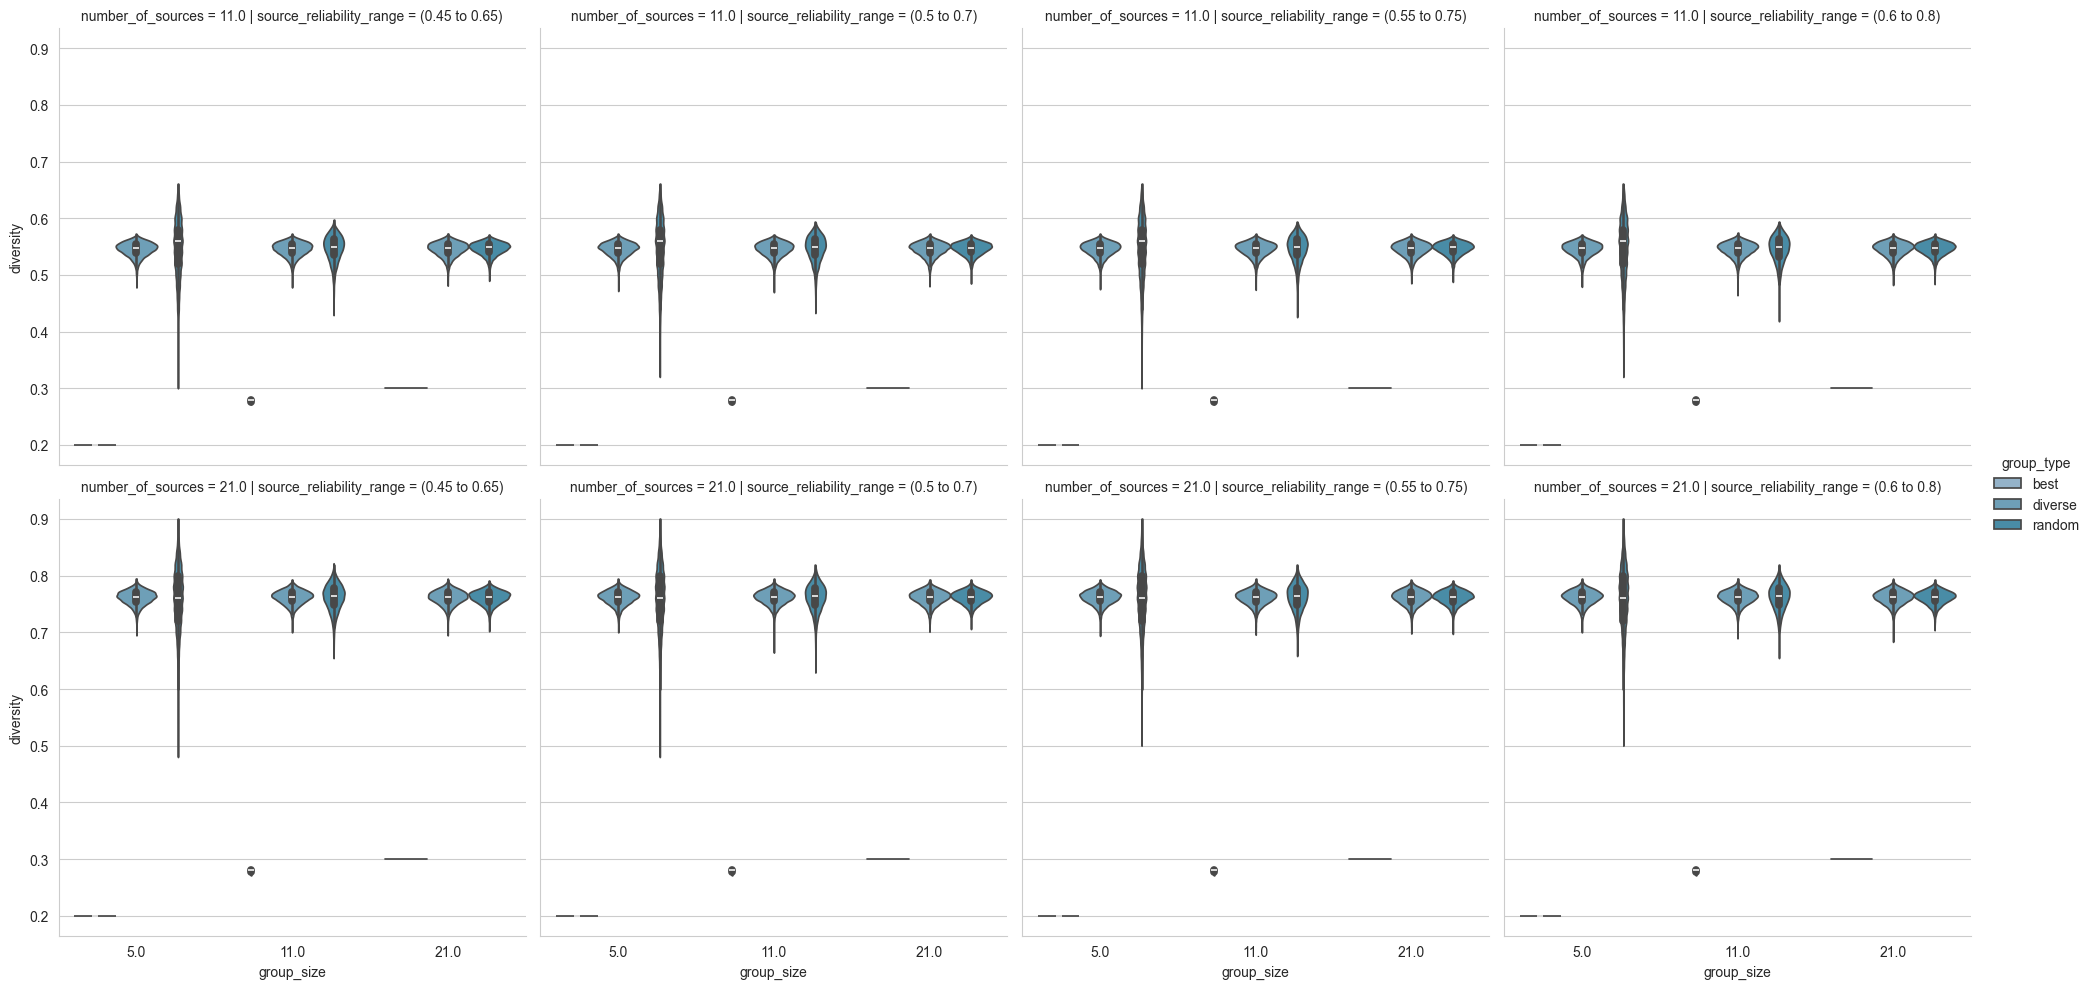

In [30]:
sns.catplot(
    data=df_groups, 
    x="group_size", 
    y="diversity", 
    hue = "group_type",
    # capsize=0.1,
    kind="violin",
    cut=0,
#     inner=None,
    orient="v",
#     split=True,
    row= "number_of_sources",
    col="sources_reliability_distribution",
    
)

# Smaller Datasets for Uwe

In [31]:
df_groups = pd.read_csv("data/sim_groups_202404.csv")
df_uwe = df_groups[df_groups["group_size"] == 11]
df_uwe = df_uwe[df_uwe["number_of_sources"] == 11]
d = {"best": 0, "diverse": 1, "random": 2}
df_uwe["group_type"].replace(d, inplace=True)

df_uwe_1 = df_uwe[df_uwe["sources_reliability_distribution"] == "(0.45 to 0.65)"]
df_uwe_1 = df_uwe_1.loc[:,["group_type", "accuracy"]]
df_uwe_1.to_csv("data/uwe1.csv", index=False)

df_uwe_2 = df_uwe[df_uwe["sources_reliability_distribution"] == "(0.6 to 0.8)"]
df_uwe_2 = df_uwe_2.loc[:,["group_type", "accuracy"]]
df_uwe_2.to_csv("data/uwe2.csv", index=False)


In [4]:
df_groups = pd.read_csv("data/sim_groups_202404.csv")

,Unnamed: 0,community_number,group_type,group_size,number_of_sources,source_degree,source_reliability_range,number_of_voting_simulations,number_of_agents,difficulty,accuracy,precision,diversity,average
0,0,3.0,best,5.0,11.0,5.0,(0.45 to 0.65),10000.0,20.0,0.711780,0.7260,0.017483,0.2,0.723392
1,1,2.0,best,5.0,11.0,5.0,(0.45 to 0.65),10000.0,20.0,0.644859,0.6699,0.018433,0.2,0.655272
2,2,1.0,best,5.0,11.0,5.0,(0.45 to 0.65),10000.0,20.0,0.714810,0.7438,0.017112,0.2,0.745771
3,3,0.0,best,5.0,11.0,5.0,(0.45 to 0.65),10000.0,20.0,0.571585,0.6398,0.018818,0.2,0.629914
4,4,4.0,best,5.0,11.0,5.0,(0.45 to 0.65),10000.0,20.0,0.680138,0.6894,0.018139,0.2,0.695622


In [5]:
df_groups.describe()

,Unnamed: 0,community_number,group_size,number_of_sources,source_degree,number_of_voting_simulations,number_of_agents,difficulty,accuracy,precision,diversity,average
count,720000.000000,720000.000000,720000.000000,720000.000000,720000.0,720000.0,720000.0,720000.000000,720000.000000,720000.000000,720000.000000,720000.000000
mean,359999.500000,4999.500000,12.333333,16.000000,5.0,10000.0,20.0,0.820177,0.805019,0.014548,0.522466,0.745835
std,207846.241246,2886.753336,6.599668,5.000003,0.0,0.0,0.0,0.118639,0.107764,0.003422,0.208335,0.099012
min,0.000000,0.000000,5.000000,11.000000,5.0,10000.0,20.0,0.458192,0.450200,0.004197,0.200000,0.461943
25%,179999.750000,2499.750000,5.000000,11.000000,5.0,10000.0,20.0,0.719935,0.723000,0.011874,0.300000,0.671915
50%,359999.500000,4999.500000,11.000000,16.000000,5.0,10000.0,20.0,0.840525,0.819800,0.015066,0.547619,0.755258
75%,539999.250000,7499.250000,21.000000,21.000000,5.0,10000.0,20.0,0.924010,0.897800,0.017542,0.752632,0.829163
max,719999.000000,9999.000000,21.000000,21.000000,5.0,10000.0,20.0,0.993135,0.988400,0.019600,0.900000,0.939108
